In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split

from src.data import Data
from src.evaluation import Evaluation
from src.explanation import report_model
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.genetic_algorithm import GeneticAlgorithm
from src.model import Model
from src.model_selection import ModelSelection
from src.preprocessing import DataPreprocessor

In [3]:
data = Data()
essays = data.load()

In [4]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [5]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [7]:
model_selection = ModelSelection()
model_selection.fit(X_train_transformed, y_train, X_test_transformed, y_test)

100%|██████████| 42/42 [00:19<00:00,  2.11it/s]

| Model                         |   Adjusted R-Squared |    R-Squared |         RMSE |   Time Taken |
|:------------------------------|---------------------:|-------------:|-------------:|-------------:|
| ExtraTreesRegressor           |          0.624267    |  0.89635     | 10.3178      |   0.232984   |
| XGBRegressor                  |          0.581771    |  0.884627    | 10.8856      |   0.587111   |
| RandomForestRegressor         |          0.521519    |  0.868005    | 11.6434      |   0.118522   |
| ExtraTreeRegressor            |          0.487892    |  0.858729    | 12.0456      |   0.00721312 |
| DecisionTreeRegressor         |          0.455449    |  0.849779    | 12.4213      |   0.00639009 |
| BaggingRegressor              |          0.429118    |  0.842515    | 12.718       |   0.0201631  |
| GradientBoostingRegressor     |          0.428215    |  0.842266    | 12.7281      |   0.054157   |
| LGBMRegressor                 |          0.384341    |  0.830163    | 13.2074   

In [8]:
model = Model(model_class=model_selection.get_best_model_class())
model.fit(X_train_transformed, y_train)
predictions = model.predict(X_train_transformed)

Root Mean Squared Error: 5.039398602694191
Mean Absolute Error: 1.9157316384181082
R2 Score: 0.9744670158402773


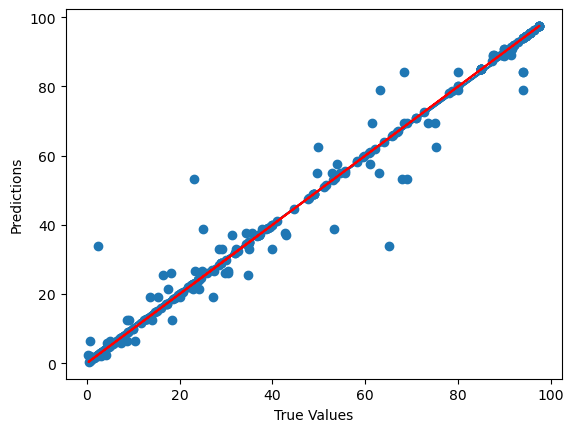

In [9]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 10.202203009871164
Mean Absolute Error: 7.516065084745772
R2 Score: 0.8986585483195484


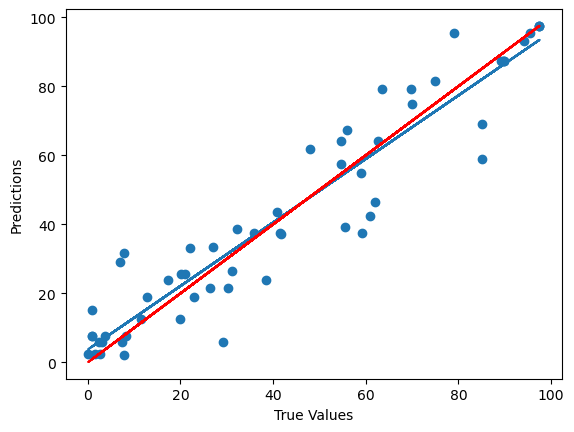

In [10]:
evaluation.report(y_test, model.predict(X_test_transformed))

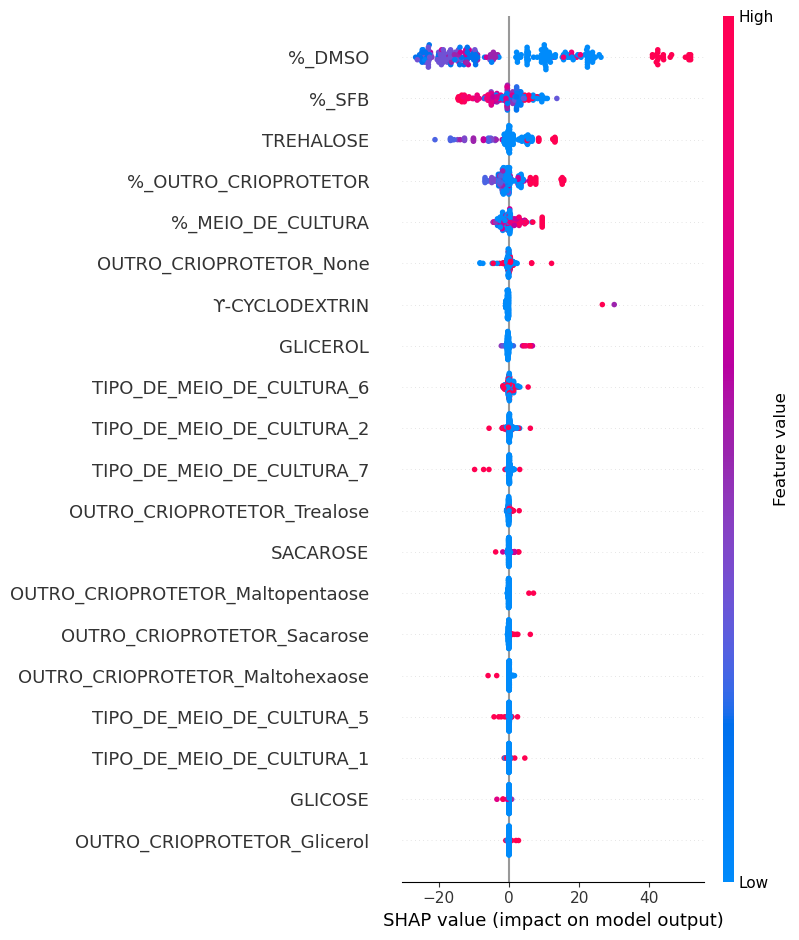

In [11]:
report_model(model, X_train_transformed)

In [12]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=30,
    max_generations=1000,
)
genetic_algorithm.fit()
genetic_algorithm.report_best_individual()

Best individual:
|                                   |   0 |
|:----------------------------------|----:|
| MALTOEXAOSE                       |   0 |
| Di-rhamnolipids                   |   0 |
| MALTOSE                           |   0 |
| %_SFB                             |  95 |
| %_OUTRO_CRIOPROTETOR              |   0 |
| %_MEIO_DE_CULTURA                 |   0 |
| DEXTRAN                           |   0 |
| ϒ-CYCLODEXTRIN                    |   0 |
| %_SOLUÇÃO_TOTAL                   | 100 |
| LACTOSE                           |   0 |
| TREHALOSE                         |   0 |
| GLICOSE                           |   0 |
| MALTOHEPTAOSE                     |   0 |
| GLICEROL                          |   0 |
| MALTOTETRAOSE                     |   0 |
| %_DMSO                            |   5 |
| SACAROSE                          |   0 |
| RAFFINOSE                         |   0 |
| MALTOPENTAOSE                     |   0 |
| MALTOTRIOSE                       |   0 |
| TIPO_DE_MEIO_

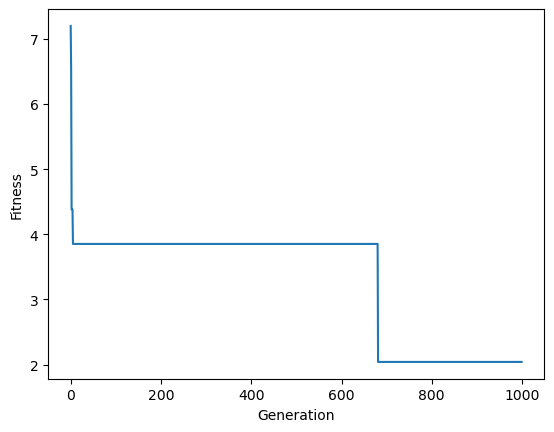

In [13]:
genetic_algorithm.show_history()